<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(0)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0'

In [4]:
os.listdir(base_path)

['data_add_delta_0_n20.csv',
 'data_add_delta_0_n30.csv',
 'data_add_delta_0_n60.csv',
 'data_add_delta_0_n120.csv',
 'data_add_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.990213,48.400385,28.304719,-0.407771,173.287546,173.448906,-0.161360
1,0.0,1.0,62.515146,99.611584,39.834445,-1.111637,210.849538,212.002642,-1.153104
2,0.0,2.0,93.821643,54.886906,93.562132,-0.414918,251.855763,252.165626,-0.309863
3,0.0,3.0,85.809941,94.205691,49.024931,-0.767991,238.272573,239.028738,-0.756165
4,0.0,4.0,86.982091,49.438096,99.022522,-0.431835,245.010873,245.339994,-0.329121
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,99.547227,37.961952,97.556931,-0.212500,244.853609,244.914464,-0.060855
119996,999.0,116.0,53.526659,92.909308,79.071552,1.499344,237.006863,235.694910,1.311954
119997,999.0,117.0,77.416154,91.005536,58.765486,0.614874,237.802049,237.353194,0.448856
119998,999.0,118.0,92.294437,47.592520,85.341210,0.954626,236.182794,235.130400,1.052394


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.990213,48.400385,28.304719,-0.407771,173.287546,173.448906,-0.161360
1,0.0,1.0,62.515146,99.611584,39.834445,-1.111637,210.849538,212.002642,-1.153104
2,0.0,2.0,93.821643,54.886906,93.562132,-0.414918,251.855763,252.165626,-0.309863
3,0.0,3.0,85.809941,94.205691,49.024931,-0.767991,238.272573,239.028738,-0.756165
4,0.0,4.0,86.982091,49.438096,99.022522,-0.431835,245.010873,245.339994,-0.329121
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,99.547227,37.961952,97.556931,-0.212500,244.853609,244.914464,-0.060855
119996,999.0,116.0,53.526659,92.909308,79.071552,1.499344,237.006863,235.694910,1.311954
119997,999.0,117.0,77.416154,91.005536,58.765486,0.614874,237.802049,237.353194,0.448856
119998,999.0,118.0,92.294437,47.592520,85.341210,0.954626,236.182794,235.130400,1.052394


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.990213  48.400385  28.304719 -0.407771  173.287546   
      1.0    62.515146  99.611584  39.834445 -1.111637  210.849538   
      2.0    93.821643  54.886906  93.562132 -0.414918  251.855763   
      3.0    85.809941  94.205691  49.024931 -0.767991  238.272573   
      4.0    86.982091  49.438096  99.022522 -0.431835  245.010873   
...                ...        ...        ...       ...         ...   
999.0 115.0  99.547227  37.961952  97.556931 -0.212500  244.853609   
      116.0  53.526659  92.909308  79.071552  1.499344  237.006863   
      117.0  77.416154  91.005536  58.765486  0.614874  237.802049   
      118.0  92.294437  47.592520  85.341210  0.954626  236.182794   
      119.0  69.303118  63.052722  29.290143  0.214123  171.860106   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.448906 -0.161360  
      1.0    212.002642 -1.153104  
      2.0    252.165626 -0.309863  
      3.0    239.028738 -0.756165  
      4.0    245.339994 -0.329121  
...                 ...       ...  
999.0 115.0  244.914464 -0.060855  
      116.0  235.694910  1.311954  
      117.0  237.353194  0.448856  
      118.0  235.130400  1.052394  
      119.0  171.609816  0.250290  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.990213  48.400385  28.304719 -0.407771  173.287546   
      1.0    62.515146  99.611584  39.834445 -1.111637  210.849538   
      2.0    93.821643  54.886906  93.562132 -0.414918  251.855763   
      3.0    85.809941  94.205691  49.024931 -0.767991  238.272573   
      4.0    86.982091  49.438096  99.022522 -0.431835  245.010873   
...                ...        ...        ...       ...         ...   
999.0 115.0  99.547227  37.961952  97.556931 -0.212500  244.853609   
      116.0  53.526659  92.909308  79.071552  1.499344  237.006863   
      117.0  77.416154  91.005536  58.765486  0.614874  237.802049   
      118.0  92.294437  47.592520  85.341210  0.954626  236.182794   
      119.0  69.303118  63.052722  29.290143  0.214123  171.860106   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.448906 -0.161360  
      1.0    212.002642 -1.153104  
      2.0    252.165626 -0.309863  
      3.0    239.028738 -0.756165  
      4.0    245.339994 -0.329121  
...                 ...       ...  
999.0 115.0  244.914464 -0.060855  
      116.0  235.694910  1.311954  
      117.0  237.353194  0.448856  
      118.0  235.130400  1.052394  
      119.0  171.609816  0.250290  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,86.990213,48.400385,28.304719,-0.407771,173.287546,173.448906,-0.161360
1,0.0,1.0,62.515146,99.611584,39.834445,-1.111637,210.849538,212.002642,-1.153104
2,0.0,2.0,93.821643,54.886906,93.562132,-0.414918,251.855763,252.165626,-0.309863
3,0.0,3.0,85.809941,94.205691,49.024931,-0.767991,238.272573,239.028738,-0.756165
4,0.0,4.0,86.982091,49.438096,99.022522,-0.431835,245.010873,245.339994,-0.329121
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,99.547227,37.961952,97.556931,-0.212500,244.853609,244.914464,-0.060855
119996,999.0,116.0,53.526659,92.909308,79.071552,1.499344,237.006863,235.694910,1.311954
119997,999.0,117.0,77.416154,91.005536,58.765486,0.614874,237.802049,237.353194,0.448856
119998,999.0,118.0,92.294437,47.592520,85.341210,0.954626,236.182794,235.130400,1.052394


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    86.990213  48.400385  28.304719 -0.407771  173.287546   
      1.0    62.515146  99.611584  39.834445 -1.111637  210.849538   
      2.0    93.821643  54.886906  93.562132 -0.414918  251.855763   
      3.0    85.809941  94.205691  49.024931 -0.767991  238.272573   
      4.0    86.982091  49.438096  99.022522 -0.431835  245.010873   
...                ...        ...        ...       ...         ...   
999.0 115.0  99.547227  37.961952  97.556931 -0.212500  244.853609   
      116.0  53.526659  92.909308  79.071552  1.499344  237.006863   
      117.0  77.416154  91.005536  58.765486  0.614874  237.802049   
      118.0  92.294437  47.592520  85.341210  0.954626  236.182794   
      119.0  69.303118  63.052722  29.290143  0.214123  171.860106   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    173.448906 -0.161360  
      1.0    212.002642 -1.153104  
      2.0    252.165626 -0.309863  
      3.0    239.028738 -0.756165  
      4.0    245.339994 -0.329121  
...                 ...       ...  
999.0 115.0  244.914464 -0.060855  
      116.0  235.694910  1.311954  
      117.0  237.353194  0.448856  
      118.0  235.130400  1.052394  
      119.0  171.609816  0.250290  

[120000 rows x 7 columns]

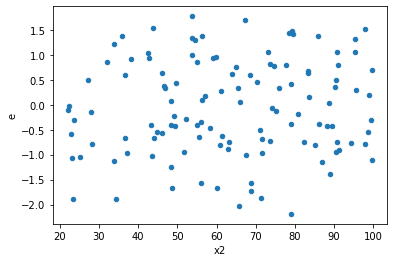

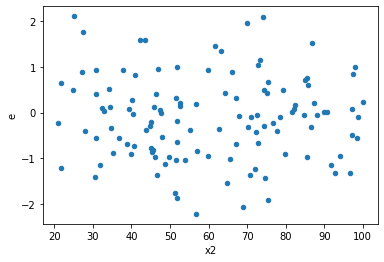

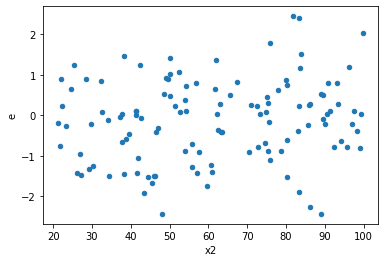

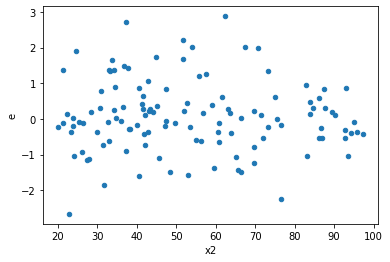

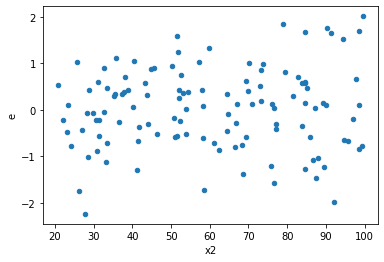

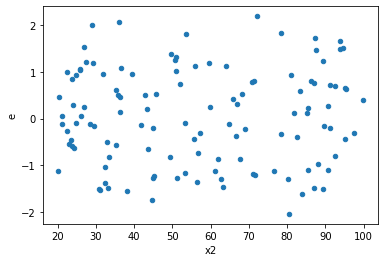

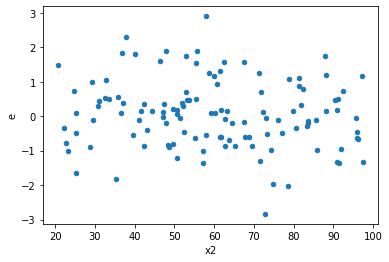

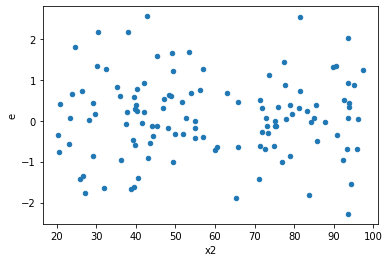

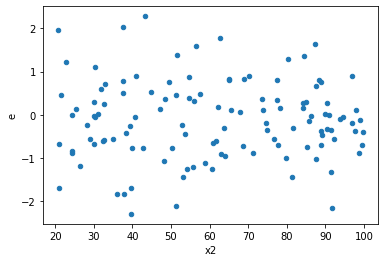

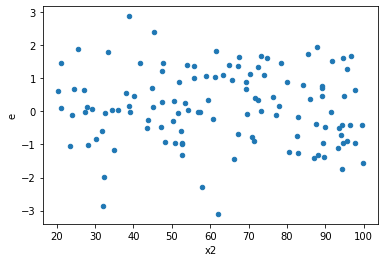

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,45.0,45.0,36.02704852535904,41.8858015163693,0.800601078341312,0.930795589252651,1.162620953722766,0.6154214010917056,0.6922892994541472,0.3077107005458528,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,39.23087663470933,51.08225289721048,0.8717972585490963,1.1351611754935662,1.3020930776758555,0.37928114718813855,0.8103594264059307,0.18964057359406927,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,31.48059028689474,33.16514761384393,0.6995686730421053,0.7370032803076428,1.0535109828499774,0.8619711425738807,0.5690144287130596,0.43098557128694037,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,44.5812854584656,52.79624547564327,0.9906952324103467,1.1732498994587393,1.1842692495897449,0.572897499704947,0.7135512501475265,0.2864487498524735,Reject001=1 : Homoscedasticity
10.0,45.0,45.0,38.76494918904981,46.75601038318544,0.861443315312218,1.0390224529596765,1.206141407671261,0.5321610814098023,0.7339194592950988,0.26608054070490117,Reject001=1 : Homoscedasticity
11.0,45.0,45.0,28.017534125536123,53.57584679304541,0.6226118694563583,1.1905743731787868,1.9122256281724157,0.032039452713849226,0.9839802736430754,0.016019726356924613,Reject001=1 : Homoscedasticity
12.0,45.0,45.0,41.94653452109682,52.28203176060663,0.9321452115799294,1.1618229280134806,1.2463969278394527,0.46298815453830633,0.7685059227308468,0.23149407726915316,Reject001=1 : Homoscedasticity
13.0,45.0,45.0,48.303882220124336,48.82034909595275,1.073419604891652,1.0848966465767278,1.0106920365836194,0.971701680579792,0.514149159710104,0.485850840289896,Reject001=1 : Homoscedasticity
14.0,45.0,45.0,38.822568878399935,64.1194949078504,0.8627237528533319,1.4248776646188976,1.651603609969384,0.09591676833957674,0.9520416158302116,0.04795838416978837,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,47.977947795044486,41.65558630378764,1.0661766176676553,0.9256796956397254,0.8682235947593019,0.6375447474633971,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,36.02704852535904,41.8858015163693,0.800601078341312,0.930795589252651,1.162620953722766,0.6154214010917056,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,39.23087663470933,51.08225289721048,0.8717972585490963,1.1351611754935662,1.3020930776758555,0.37928114718813855,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,47.16178697042733,30.544053047577265,1.0480397104539407,0.6787567343906059,0.6476440993792247,0.14891022102454368,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,31.48059028689474,33.16514761384393,0.6995686730421053,0.7370032803076428,1.0535109828499774,0.8619711425738807,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,44.5812854584656,52.79624547564327,0.9906952324103467,1.1732498994587393,1.1842692495897449,0.572897499704947,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,52.740336675416955,38.91581339164937,1.1720074816759323,0.8647958531477639,0.7378757104102562,0.31153784171790666,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,57.73816581518068,28.580672992222418,1.2830703514484596,0.6351260664938315,0.49500486530363436,0.020226645771631017,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,44.342357799625766,30.236825517611194,0.9853857288805726,0.6719294559469154,0.6818948521917881,0.20292690218971104,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      994
Reject001=0 : Heteroscedasticity      6
Name: Result_test, dtype: int64